## Mengkoneksikan Colab dengan Gdrive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

## Import Packages

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt2
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Setting Path & Check Directory

In [21]:
# im using local env

## Import Data

Gunakan data avocado.csv

In [22]:
data = pd.read_csv('avocado.csv')
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Case 1

Dari data avocado, tampilkan :<br>
a. line plot dari total bags<br>
b. line graph dari 3 jenis bags dalam 1 layout terhadap Date<br>
c. Interpretasikan insight  yang didapatkan

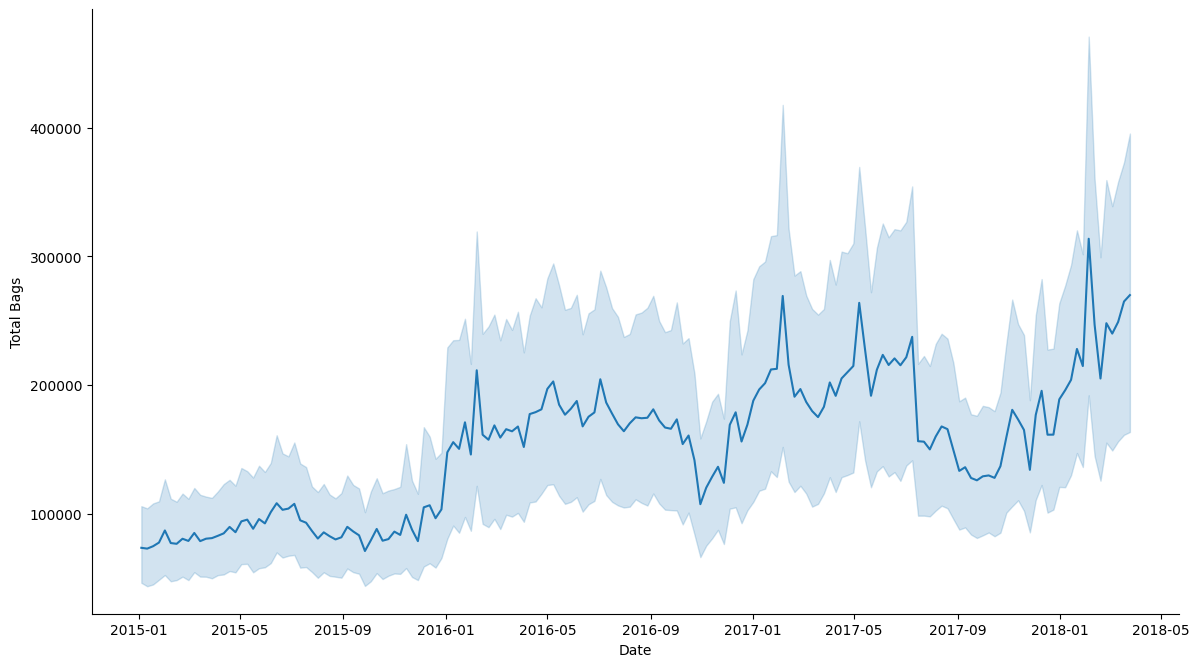

In [23]:
# a 
data['Date'] = pd.to_datetime(data['Date'])
data[['Date']].dtypes
g=sns.relplot(x="Date", y="Total Bags", kind="line",data=data, height=3)
g.fig.set_size_inches(20,8)

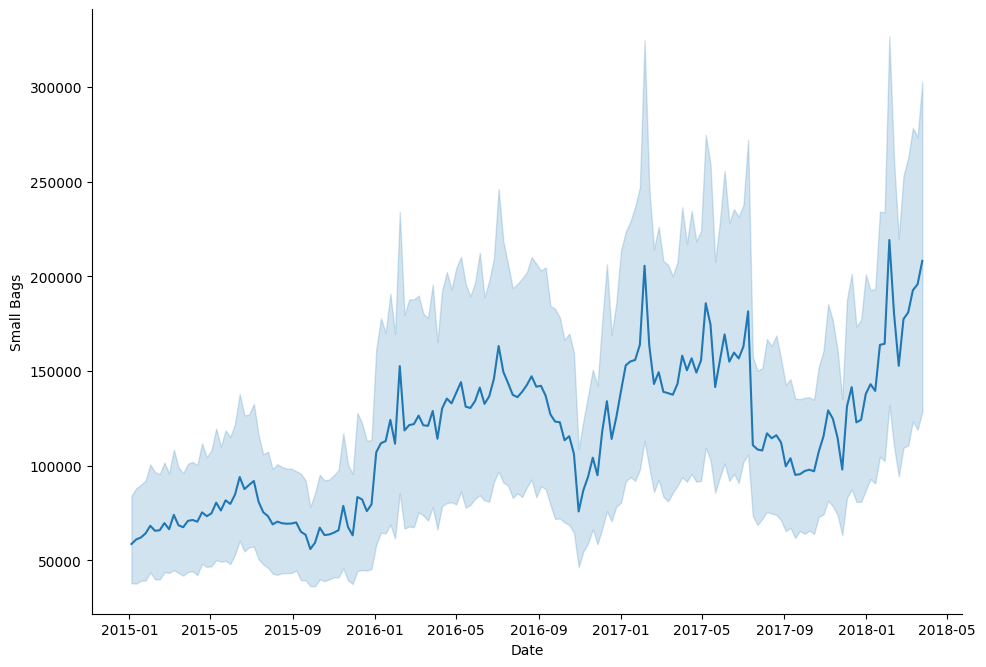

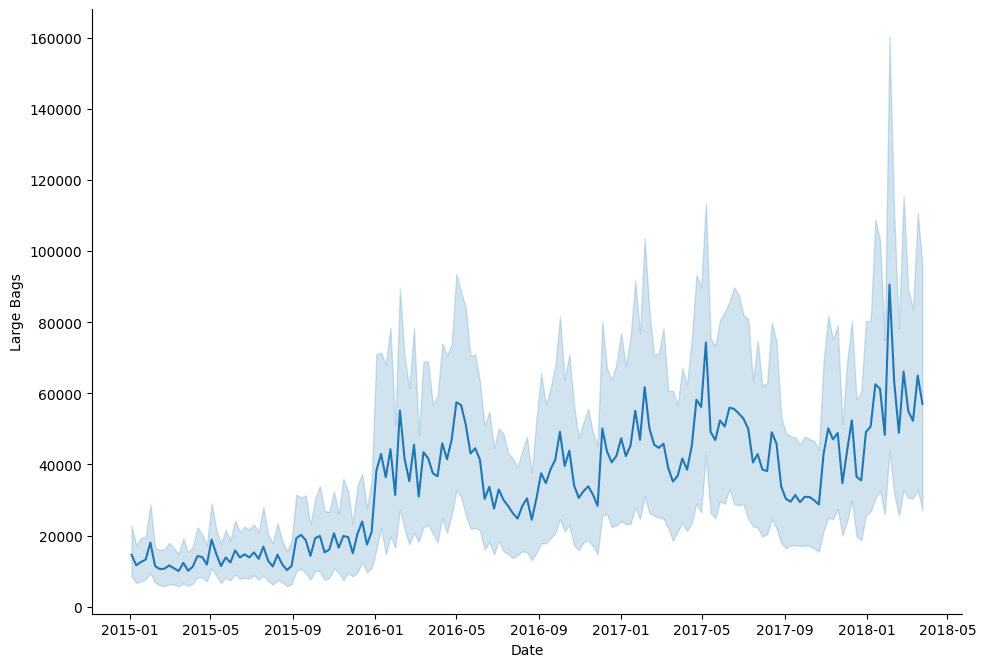

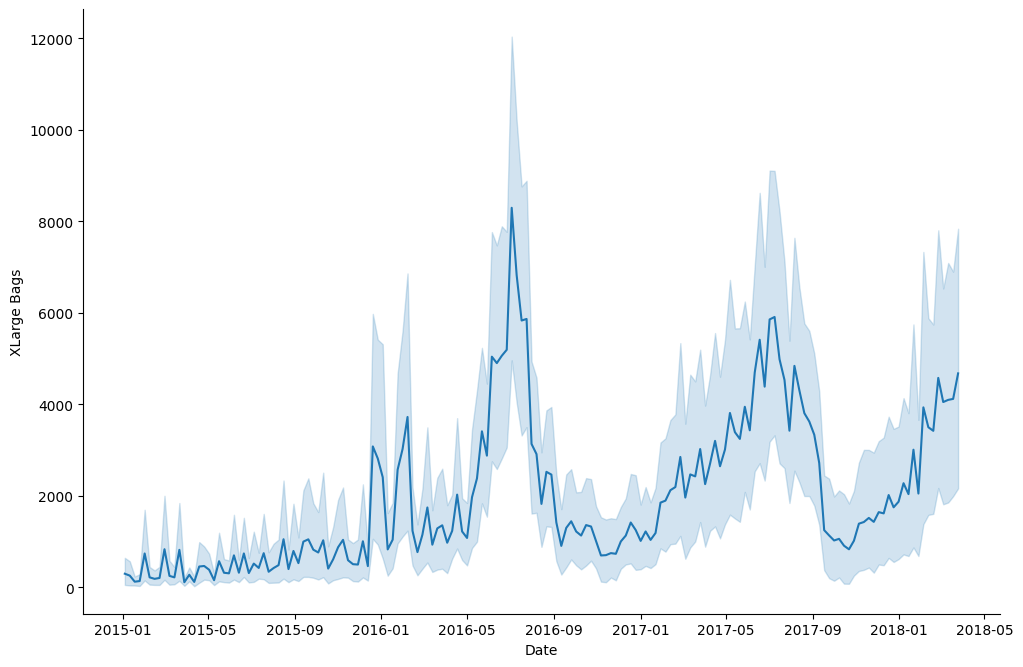

In [26]:
g=sns.relplot(x="Date", y="Small Bags", kind="line",data=data, height=3)
g.fig.set_size_inches(16,8)
g=sns.relplot(x="Date", y="Large Bags", kind="line",data=data, height=3)
g.fig.set_size_inches(16,8)
g=sns.relplot(x="Date", y="XLarge Bags", kind="line",data=data, height=3)
g.fig.set_size_inches(16,8)

# Case 2

Berdasarkan data avocado, tampilkan statistika deskriptif secara boxplot terkait penyebaran dari rata rata harga untuk masing-masing store (4046,4225,4770) dalam 1 layer, lalu interpretasikan hasil yang didapatkan dari visual tersebut.

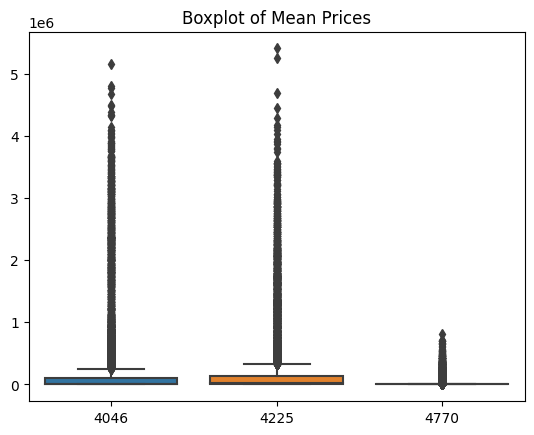

In [38]:
# Calculate mean price for each store
mean_prices = data[['4046','4225','4770']].mean()

# Create boxplot based on mean prices
sns.boxplot(data=mean_prices)
plt.title('Boxplot of Mean Prices')
plt.show()

# Case 3

a. Hitunglah total bags setiap region setiap tahunnya<br>
b. Buatlah stacked bar chart total bags setiap region dalam 1 layout terhadap tahunnya

In [50]:
# a
data = pd.read_csv('avocado.csv')
bagsByYearandDate = data.groupby([data['Date'].dt.year, 'region'])['Total Bags'].sum()
print(bagsByYearandDate)

Date  region             
2015  Albany                   719655.60
      Atlanta                 2996990.87
      BaltimoreWashington     9488314.66
      Boise                    518034.51
      Boston                  5758714.81
                                ...     
2018  StLouis                 1224526.40
      Syracuse                 398954.62
      Tampa                   1887750.82
      West                   38053293.04
      WestTexNewMexico        3696514.36
Name: Total Bags, Length: 212, dtype: float64


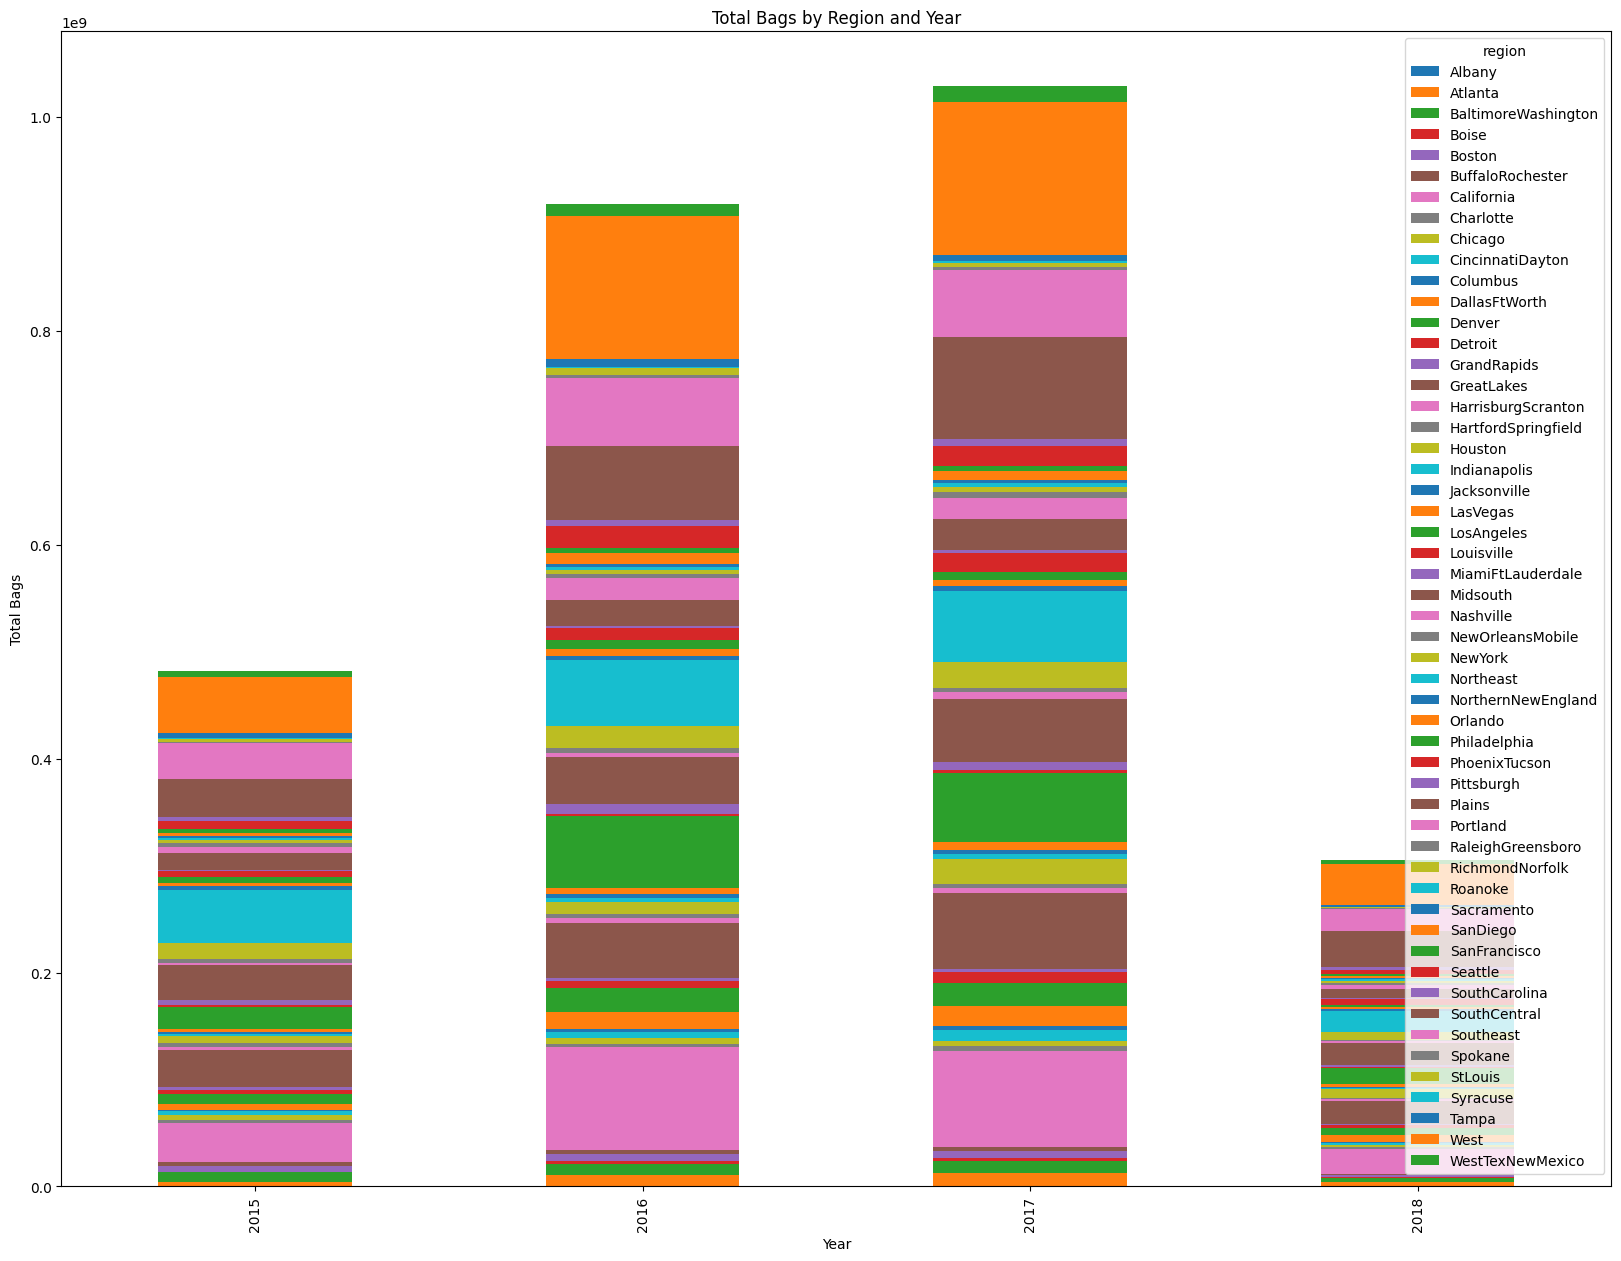

In [67]:
# b
total_bags_by_region_and_year = data.groupby([data['Date'].dt.year, 'region'])['Total Bags'].sum().reset_index()

stacked_data = total_bags_by_region_and_year.pivot(index='Date', columns='region', values='Total Bags')

stacked_data.plot(kind='bar', stacked=True, figsize=(20,15))

# merapihkan chart
plt.title('Total Bags by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Bags')
plt.show()